In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import time
import seaborn as sns

###
📘 DATASET DESCRIPTION

| Column Name | Description |
|--------------|-------------|
| FL_DATE | Date of flight (YYYY-MM-DD) |
| AIRLINE | Airline name (e.g., Delta Air Lines, Southwest Airlines) |
| AIRLINE_DOT | Official DOT code for the airline |
| AIRLINE_CODE | Airline abbreviation or internal code |
| DOT_CODE | Numeric DOT identifier for the airline |
| FL_NUMBER | Flight number |
| ORIGIN | Origin airport IATA code |
| ORIGIN_CITY | Origin city name |
| DEST | Destination airport IATA code |
| DEST_CITY | Destination city name |
| CRS_DEP_TIME | Scheduled departure time (local, in HHMM format) |
| DEP_TIME | Actual departure time (NaN if cancelled) |
| DEP_DELAY | Departure delay in minutes (negative if early) |
| TAXI_OUT | Taxi-out time before takeoff (in minutes) |
| WHEELS_OFF | Actual time when aircraft left the ground |
| WHEELS_ON | Actual time when aircraft landed |
| TAXI_IN | Taxi-in time after landing (in minutes) |
| CRS_ARR_TIME | Scheduled arrival time (local, in HHMM format) |
| ARR_TIME | Actual arrival time (NaN if cancelled or diverted) |
| ARR_DELAY | Arrival delay in minutes (negative if early) |
| CANCELLED | 1 if flight was cancelled, else 0 |
| CANCELLATION_CODE | Reason for cancellation (A=Carrier, B=Weather, C=NAS, D=Security) |
| DIVERTED | 1 if flight landed at a different airport, else 0 |
| CRS_ELAPSED_TIME | Scheduled flight time (in minutes) |
| ELAPSED_TIME | Actual flight time (NaN if cancelled or diverted) |
| AIR_TIME | Time spent flying (NaN if cancelled or diverted) |
| DISTANCE | Distance between airports (in miles) |
| DELAY_DUE_CARRIER | Delay minutes due to carrier issues |
| DELAY_DUE_WEATHER | Delay minutes due to weather |
| DELAY_DUE_NAS | Delay minutes due to National Airspace System (ATC etc.) |
| DELAY_DUE_SECURITY | Delay minutes due to security issues |
| DELAY_DUE_LATE_AIRCRAFT | Delay minutes due to previous aircraft arriving late |


# Data Preprocessing

In [188]:
df=pd.read_csv('flights_data.csv')

In [189]:
df=pd.DataFrame(df)
df

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,09-01-2019,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0,186.0,176.0,153.0,1065,NaN,NaN,NaN,NaN,NaN
1,19-11-2022,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0,235.0,236.0,189.0,1399,NaN,NaN,NaN,NaN,NaN
2,22-07-2022,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0,118.0,112.0,87.0,680,NaN,NaN,NaN,NaN,NaN
3,06-03-2023,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0,260.0,285.0,249.0,1589,0.0,0.0,24.0,0.0,0.0
4,23-02-2020,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0,181.0,182.0,153.0,985,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,09-03-2020,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2108,PHX,"Phoenix, AZ",SJC,"San Jose, CA",...,0,120.0,105.0,91.0,621,0.0,0.0,0.0,0.0,55.0
1048571,27-01-2019,Endeavor Air Inc.,Endeavor Air Inc.: 9E,9E,20363,5482,HPN,"White Plains, NY",ATL,"Atlanta, GA",...,0,157.0,164.0,144.0,780,NaN,NaN,NaN,NaN,NaN
1048572,07-05-2021,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2345,CLT,"Charlotte, NC",BDL,"Hartford, CT",...,0,122.0,109.0,92.0,644,NaN,NaN,NaN,NaN,NaN
1048573,19-12-2022,Envoy Air,Envoy Air: MQ,MQ,20398,3754,MIA,"Miami, FL",GSO,"Greensboro/High Point, NC",...,0,132.0,132.0,105.0,710,6.0,0.0,0.0,0.0,59.0


In [190]:
df.shape

(1048575, 32)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 32 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   FL_DATE                  1048575 non-null  object 
 1   AIRLINE                  1048575 non-null  object 
 2   AIRLINE_DOT              1048575 non-null  object 
 3   AIRLINE_CODE             1048575 non-null  object 
 4   DOT_CODE                 1048575 non-null  int64  
 5   FL_NUMBER                1048575 non-null  int64  
 6   ORIGIN                   1048575 non-null  object 
 7   ORIGIN_CITY              1048575 non-null  object 
 8   DEST                     1048575 non-null  object 
 9   DEST_CITY                1048575 non-null  object 
 10  CRS_DEP_TIME             1048575 non-null  int64  
 11  DEP_TIME                 1021527 non-null  float64
 12  DEP_DELAY                1021518 non-null  float64
 13  TAXI_OUT                 1021103 non-null 

In [192]:
df.isnull().sum()

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                     27048
DEP_DELAY                    27057
TAXI_OUT                     27472
WHEELS_OFF                   27472
WHEELS_ON                    27866
TAXI_IN                      27866
CRS_ARR_TIME                     0
ARR_TIME                     27866
ARR_DELAY                    30005
CANCELLED                        0
CANCELLATION_CODE          1020978
DIVERTED                         0
CRS_ELAPSED_TIME                 7
ELAPSED_TIME                 30005
AIR_TIME                     30005
DISTANCE                         0
DELAY_DUE_CARRIER           861303
DELAY_DUE_WEATHER   

In [193]:
#Filling the cancellation code column missing values with Not cancelled
df.fillna({"CANCELLATION_CODE":"Not Cancelled"}, inplace=True)
df["CANCELLATION_CODE"].value_counts()

CANCELLATION_CODE
Not Cancelled    1020978
B                   9984
D                   8511
A                   6830
C                   2272
Name: count, dtype: int64

In [194]:
df[['CANCELLATION_CODE']].isna().sum()

CANCELLATION_CODE    0
dtype: int64

In [195]:
# Check if any cancelled flights still have "Not Cancelled" (which would be wrong)
wrong_cancelled = df[(df["CANCELLED"] == 1) & (df["CANCELLATION_CODE"] == "Not Cancelled")]
print("Cancelled flights with wrong code:", wrong_cancelled.shape[0])

Cancelled flights with wrong code: 0


In [196]:
cancelled=df[df['CANCELLED']==1]
cancelled.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
14,07-04-2020,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,687,SJC,"San Jose, CA",LAX,"Los Angeles, CA",...,0,80.0,NaN,NaN,308,NaN,NaN,NaN,NaN,NaN
45,02-01-2022,Republic Airline,Republic Airline: YX,YX,20452,3467,ORD,"Chicago, IL",DCA,"Washington, DC",...,0,126.0,NaN,NaN,612,NaN,NaN,NaN,NaN,NaN
80,20-04-2020,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,246,BNA,"Nashville, TN",ATL,"Atlanta, GA",...,0,65.0,NaN,NaN,214,NaN,NaN,NaN,NaN,NaN
191,31-12-2021,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,1097,IAD,"Washington, DC",LAX,"Los Angeles, CA",...,0,364.0,NaN,NaN,2288,NaN,NaN,NaN,NaN,NaN
236,14-04-2020,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,446,LAS,"Las Vegas, NV",HOU,"Houston, TX",...,0,175.0,NaN,NaN,1235,NaN,NaN,NaN,NaN,NaN


In [197]:
cancelled[["DEP_TIME", "ARR_TIME", "WHEELS_ON", "WHEELS_OFF",
               "TAXI_OUT", "TAXI_IN", "ARR_DELAY", "DEP_DELAY",
               "ELAPSED_TIME", "AIR_TIME","DELAY_DUE_CARRIER", "DELAY_DUE_WEATHER", "DELAY_DUE_NAS",
              "DELAY_DUE_SECURITY", "DELAY_DUE_LATE_AIRCRAFT"]].isna().sum()

DEP_TIME                   27048
ARR_TIME                   27597
WHEELS_ON                  27597
WHEELS_OFF                 27472
TAXI_OUT                   27472
TAXI_IN                    27597
ARR_DELAY                  27597
DEP_DELAY                  27057
ELAPSED_TIME               27597
AIR_TIME                   27597
DELAY_DUE_CARRIER          27597
DELAY_DUE_WEATHER          27597
DELAY_DUE_NAS              27597
DELAY_DUE_SECURITY         27597
DELAY_DUE_LATE_AIRCRAFT    27597
dtype: int64

In [198]:
#Filling all the time and delay columns with NaN for cancelled flights 
cancelled_mask=df["CANCELLED"] == 1
cols = ["DEP_TIME", "ARR_TIME", "WHEELS_ON", "WHEELS_OFF",
               "TAXI_OUT", "TAXI_IN", "ARR_DELAY", "DEP_DELAY",
               "ELAPSED_TIME", "AIR_TIME", "DELAY_DUE_CARRIER", "DELAY_DUE_WEATHER", "DELAY_DUE_NAS",
              "DELAY_DUE_SECURITY", "DELAY_DUE_LATE_AIRCRAFT"]
df.loc[cancelled_mask ,cols] = np.nan

In [199]:
df.loc[cancelled_mask ,cols].isnull().sum()

DEP_TIME                   27597
ARR_TIME                   27597
WHEELS_ON                  27597
WHEELS_OFF                 27597
TAXI_OUT                   27597
TAXI_IN                    27597
ARR_DELAY                  27597
DEP_DELAY                  27597
ELAPSED_TIME               27597
AIR_TIME                   27597
DELAY_DUE_CARRIER          27597
DELAY_DUE_WEATHER          27597
DELAY_DUE_NAS              27597
DELAY_DUE_SECURITY         27597
DELAY_DUE_LATE_AIRCRAFT    27597
dtype: int64

In [200]:
non_cancelled = df[df["CANCELLED"] == 0]
non_cancelled.shape

(1020978, 32)

In [201]:
#How many null values in the respective columns of non-cancelled flights
non_cancelled[["DEP_TIME", "ARR_TIME", "WHEELS_ON", "WHEELS_OFF",
               "TAXI_OUT", "TAXI_IN", "ARR_DELAY", "DEP_DELAY",
               "ELAPSED_TIME", "AIR_TIME","DELAY_DUE_CARRIER", "DELAY_DUE_WEATHER", "DELAY_DUE_NAS",
              "DELAY_DUE_SECURITY", "DELAY_DUE_LATE_AIRCRAFT"]].isna().sum()

DEP_TIME                        0
ARR_TIME                      269
WHEELS_ON                     269
WHEELS_OFF                      0
TAXI_OUT                        0
TAXI_IN                       269
ARR_DELAY                    2408
DEP_DELAY                       0
ELAPSED_TIME                 2408
AIR_TIME                     2408
DELAY_DUE_CARRIER          833706
DELAY_DUE_WEATHER          833706
DELAY_DUE_NAS              833706
DELAY_DUE_SECURITY         833706
DELAY_DUE_LATE_AIRCRAFT    833706
dtype: int64

In [202]:
#To check how many flights are diverted from the non-cancelled flights
non_cancelled[non_cancelled["DIVERTED"] == 1][["DEP_TIME", "ARR_TIME", "WHEELS_ON", "WHEELS_OFF",
               "TAXI_OUT", "TAXI_IN", "ARR_DELAY", "DEP_DELAY",
               "ELAPSED_TIME", "AIR_TIME", "DELAY_DUE_CARRIER", "DELAY_DUE_WEATHER", "DELAY_DUE_NAS",
              "DELAY_DUE_SECURITY", "DELAY_DUE_LATE_AIRCRAFT","CRS_ARR_TIME","CRS_ELAPSED_TIME"]].isna().sum()

DEP_TIME                      0
ARR_TIME                    268
WHEELS_ON                   268
WHEELS_OFF                    0
TAXI_OUT                      0
TAXI_IN                     268
ARR_DELAY                  2407
DEP_DELAY                     0
ELAPSED_TIME               2407
AIR_TIME                   2407
DELAY_DUE_CARRIER          2407
DELAY_DUE_WEATHER          2407
DELAY_DUE_NAS              2407
DELAY_DUE_SECURITY         2407
DELAY_DUE_LATE_AIRCRAFT    2407
CRS_ARR_TIME                  0
CRS_ELAPSED_TIME              0
dtype: int64

In [203]:
#Fill the missing values in departure time column in non-cancelled but diverted flights with NaN values 
diverted = (df["DIVERTED"] == 1) & (df["CANCELLED"] == 0)
arrival_cols = ["ARR_TIME", "WHEELS_ON", "TAXI_IN", "ARR_DELAY",
                "ELAPSED_TIME", "AIR_TIME", "DELAY_DUE_CARRIER", "DELAY_DUE_WEATHER", "DELAY_DUE_NAS",
              "DELAY_DUE_SECURITY", "DELAY_DUE_LATE_AIRCRAFT"]
df.loc[diverted ,arrival_cols] = np.nan

In [204]:
df.loc[diverted, arrival_cols].isna().sum()

ARR_TIME                   2407
WHEELS_ON                  2407
TAXI_IN                    2407
ARR_DELAY                  2407
ELAPSED_TIME               2407
AIR_TIME                   2407
DELAY_DUE_CARRIER          2407
DELAY_DUE_WEATHER          2407
DELAY_DUE_NAS              2407
DELAY_DUE_SECURITY         2407
DELAY_DUE_LATE_AIRCRAFT    2407
dtype: int64

In [205]:
#Checking for missing values in the columns that are not diverted and not cancelled (normal flights missing value)
normal_flights = (df["DIVERTED"] == 0) & (df["CANCELLED"] == 0)
cols=["DEP_TIME", "ARR_TIME", "WHEELS_ON", "WHEELS_OFF",
               "TAXI_OUT", "TAXI_IN", "ARR_DELAY", "DEP_DELAY",
               "ELAPSED_TIME", "AIR_TIME", "DELAY_DUE_CARRIER", "DELAY_DUE_WEATHER", "DELAY_DUE_NAS",
              "DELAY_DUE_SECURITY", "DELAY_DUE_LATE_AIRCRAFT","CRS_ARR_TIME","CRS_ELAPSED_TIME"]
df.loc[normal_flights, cols].isna().sum()

DEP_TIME                        0
ARR_TIME                        1
WHEELS_ON                       1
WHEELS_OFF                      0
TAXI_OUT                        0
TAXI_IN                         1
ARR_DELAY                       1
DEP_DELAY                       0
ELAPSED_TIME                    1
AIR_TIME                        1
DELAY_DUE_CARRIER          831299
DELAY_DUE_WEATHER          831299
DELAY_DUE_NAS              831299
DELAY_DUE_SECURITY         831299
DELAY_DUE_LATE_AIRCRAFT    831299
CRS_ARR_TIME                    0
CRS_ELAPSED_TIME                0
dtype: int64

In [206]:
time_cols = ["CRS_DEP_TIME", "DEP_TIME", "CRS_ARR_TIME", "ARR_TIME", "WHEELS_OFF", "WHEELS_ON"]
print(df[time_cols].head(10))

   CRS_DEP_TIME  DEP_TIME  CRS_ARR_TIME  ARR_TIME  WHEELS_OFF  WHEELS_ON
0          1155    1151.0          1501    1447.0      1210.0     1443.0
1          2120    2114.0          2315    2310.0      2123.0     2232.0
2           954    1000.0          1252    1252.0      1020.0     1247.0
3          1609    1608.0          1829    1853.0      1635.0     1844.0
4          1840    1838.0          2041    2040.0      1853.0     2026.0
5          1010    1237.0          1110    1331.0      1252.0     1328.0
6          1010    1001.0          1159    1130.0      1024.0     1122.0
7          1643    1637.0          1945    2008.0      1659.0     1927.0
8           530     527.0           717     706.0       538.0      658.0
9          2125    2116.0          2355    2356.0      2135.0     2353.0


In [207]:
# Handling missing values for normal flights (not diverted and not cancelled)
mask = (df['CANCELLED'] == 0) & (df['DIVERTED'] == 0)
columns_to_check = ['ARR_TIME', 'WHEELS_ON', 'TAXI_IN', 'ARR_DELAY', 'ELAPSED_TIME', 'AIR_TIME']
drop_mask = mask & df[columns_to_check].isna().any(axis=1)

# Print value counts before and after
print("Before:", df.shape)
df = df[~drop_mask].copy()
print("After:", df.shape)

Before: (1048575, 32)
After: (1048574, 32)


In [208]:
time_cols = ["CRS_DEP_TIME", "DEP_TIME", "CRS_ARR_TIME", "ARR_TIME", "WHEELS_OFF", "WHEELS_ON"]
print(df[time_cols].head(10))

   CRS_DEP_TIME  DEP_TIME  CRS_ARR_TIME  ARR_TIME  WHEELS_OFF  WHEELS_ON
0          1155    1151.0          1501    1447.0      1210.0     1443.0
1          2120    2114.0          2315    2310.0      2123.0     2232.0
2           954    1000.0          1252    1252.0      1020.0     1247.0
3          1609    1608.0          1829    1853.0      1635.0     1844.0
4          1840    1838.0          2041    2040.0      1853.0     2026.0
5          1010    1237.0          1110    1331.0      1252.0     1328.0
6          1010    1001.0          1159    1130.0      1024.0     1122.0
7          1643    1637.0          1945    2008.0      1659.0     1927.0
8           530     527.0           717     706.0       538.0      658.0
9          2125    2116.0          2355    2356.0      2135.0     2353.0


In [209]:
delay_cols=["DELAY_DUE_CARRIER", "DELAY_DUE_WEATHER", "DELAY_DUE_NAS",
              "DELAY_DUE_SECURITY", "DELAY_DUE_LATE_AIRCRAFT","CRS_ARR_TIME","CRS_ELAPSED_TIME"]
df.loc[normal_flights, delay_cols] = df.loc[normal_flights, delay_cols].fillna(0)

In [210]:
df.loc[normal_flights, cols].isna().sum()

DEP_TIME                   0
ARR_TIME                   0
WHEELS_ON                  0
WHEELS_OFF                 0
TAXI_OUT                   0
TAXI_IN                    0
ARR_DELAY                  0
DEP_DELAY                  0
ELAPSED_TIME               0
AIR_TIME                   0
DELAY_DUE_CARRIER          0
DELAY_DUE_WEATHER          0
DELAY_DUE_NAS              0
DELAY_DUE_SECURITY         0
DELAY_DUE_LATE_AIRCRAFT    0
CRS_ARR_TIME               0
CRS_ELAPSED_TIME           0
dtype: int64

In [211]:
time_cols = ["CRS_DEP_TIME", "DEP_TIME", "CRS_ARR_TIME", "ARR_TIME", "WHEELS_OFF", "WHEELS_ON"]
print(df[time_cols].head(10))

   CRS_DEP_TIME  DEP_TIME  CRS_ARR_TIME  ARR_TIME  WHEELS_OFF  WHEELS_ON
0          1155    1151.0          1501    1447.0      1210.0     1443.0
1          2120    2114.0          2315    2310.0      2123.0     2232.0
2           954    1000.0          1252    1252.0      1020.0     1247.0
3          1609    1608.0          1829    1853.0      1635.0     1844.0
4          1840    1838.0          2041    2040.0      1853.0     2026.0
5          1010    1237.0          1110    1331.0      1252.0     1328.0
6          1010    1001.0          1159    1130.0      1024.0     1122.0
7          1643    1637.0          1945    2008.0      1659.0     1927.0
8           530     527.0           717     706.0       538.0      658.0
9          2125    2116.0          2355    2356.0      2135.0     2353.0


In [212]:
df.info()   #The missing values are filled (no null values)

<class 'pandas.core.frame.DataFrame'>
Index: 1048574 entries, 0 to 1048574
Data columns (total 32 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   FL_DATE                  1048574 non-null  object 
 1   AIRLINE                  1048574 non-null  object 
 2   AIRLINE_DOT              1048574 non-null  object 
 3   AIRLINE_CODE             1048574 non-null  object 
 4   DOT_CODE                 1048574 non-null  int64  
 5   FL_NUMBER                1048574 non-null  int64  
 6   ORIGIN                   1048574 non-null  object 
 7   ORIGIN_CITY              1048574 non-null  object 
 8   DEST                     1048574 non-null  object 
 9   DEST_CITY                1048574 non-null  object 
 10  CRS_DEP_TIME             1048574 non-null  int64  
 11  DEP_TIME                 1020977 non-null  float64
 12  DEP_DELAY                1020977 non-null  float64
 13  TAXI_OUT                 1020977 non-null  floa

In [239]:
df["FL_DATE"] = pd.to_datetime(df["FL_DATE"], format="%d-%m-%Y", errors="coerce")

In [241]:
df[['FL_DATE']].isna().sum()

FL_DATE    0
dtype: int64

In [243]:
df[time_cols].isnull().sum()

CRS_DEP_TIME        0
DEP_TIME        27597
CRS_ARR_TIME        0
ARR_TIME        30004
WHEELS_OFF      27597
WHEELS_ON       30004
dtype: int64

In [245]:
def to_time_only(val):
    if pd.isna(val):
        return np.nan
    try:
        # Convert float like 930.0 → "930"
        val = str(int(float(val)))
        # Pad with zeros so "530" → "0530"
        val = val.zfill(4)
        hour = int(val[:2])
        minute = int(val[2:])
        # Check for valid hour/minute ranges
        if 0 <= hour < 24 and 0 <= minute < 60:
            return time(hour, minute)
        else:
            return np.nan
    except Exception:
        return np.nan

time_cols = ["CRS_DEP_TIME", "DEP_TIME", "CRS_ARR_TIME", "ARR_TIME", "WHEELS_OFF", "WHEELS_ON"]

for col in time_cols:
    df[col] = df[col].apply(to_time_only)

In [247]:
df.isnull().sum()

FL_DATE                        0
AIRLINE                        0
AIRLINE_DOT                    0
AIRLINE_CODE                   0
DOT_CODE                       0
FL_NUMBER                      0
ORIGIN                         0
ORIGIN_CITY                    0
DEST                           0
DEST_CITY                      0
CRS_DEP_TIME                   0
DEP_TIME                   27681
DEP_DELAY                  27597
TAXI_OUT                   27597
WHEELS_OFF                 27747
WHEELS_ON                  30395
TAXI_IN                    30004
CRS_ARR_TIME                  10
ARR_TIME                   30491
ARR_DELAY                  30004
CANCELLED                      0
CANCELLATION_CODE              0
DIVERTED                       0
CRS_ELAPSED_TIME               7
ELAPSED_TIME               30004
AIR_TIME                   30004
DISTANCE                       0
DELAY_DUE_CARRIER          30004
DELAY_DUE_WEATHER          30004
DELAY_DUE_NAS              30004
DELAY_DUE_

In [249]:
df[time_cols].head(10)

,CRS_DEP_TIME,DEP_TIME,CRS_ARR_TIME,ARR_TIME,WHEELS_OFF,WHEELS_ON
0,11:55:00,11:51:00,15:01:00,14:47:00,12:10:00,14:43:00
1,21:20:00,21:14:00,23:15:00,23:10:00,21:23:00,22:32:00
2,09:54:00,10:00:00,12:52:00,12:52:00,10:20:00,12:47:00
3,16:09:00,16:08:00,18:29:00,18:53:00,16:35:00,18:44:00
4,18:40:00,18:38:00,20:41:00,20:40:00,18:53:00,20:26:00
5,10:10:00,12:37:00,11:10:00,13:31:00,12:52:00,13:28:00
6,10:10:00,10:01:00,11:59:00,11:30:00,10:24:00,11:22:00
7,16:43:00,16:37:00,19:45:00,20:08:00,16:59:00,19:27:00
8,05:30:00,05:27:00,07:17:00,07:06:00,05:38:00,06:58:00
9,21:25:00,21:16:00,23:55:00,23:56:00,21:35:00,23:53:00


In [251]:
# Derive hour from scheduled departure time
df["DEP_HOUR"] = df["CRS_DEP_TIME"].apply(lambda t: t.hour if pd.notna(t) else np.nan)

# Derive date-based features
df["MONTH"] = df["FL_DATE"].dt.month
df["DAY_OF_WEEK"] = df["FL_DATE"].dt.dayofweek  # Monday=0, Sunday=6
df["DAY_NAME"] = df["FL_DATE"].dt.day_name()

# Create route feature (Origin → Destination)
df["ROUTE"] = df["ORIGIN"] + "-" + df["DEST"]

In [253]:
df.isnull().sum()

FL_DATE                        0
AIRLINE                        0
AIRLINE_DOT                    0
AIRLINE_CODE                   0
DOT_CODE                       0
FL_NUMBER                      0
ORIGIN                         0
ORIGIN_CITY                    0
DEST                           0
DEST_CITY                      0
CRS_DEP_TIME                   0
DEP_TIME                   27681
DEP_DELAY                  27597
TAXI_OUT                   27597
WHEELS_OFF                 27747
WHEELS_ON                  30395
TAXI_IN                    30004
CRS_ARR_TIME                  10
ARR_TIME                   30491
ARR_DELAY                  30004
CANCELLED                      0
CANCELLATION_CODE              0
DIVERTED                       0
CRS_ELAPSED_TIME               7
ELAPSED_TIME               30004
AIR_TIME                   30004
DISTANCE                       0
DELAY_DUE_CARRIER          30004
DELAY_DUE_WEATHER          30004
DELAY_DUE_NAS              30004
DELAY_DUE_

# Exploratory Data Analysis

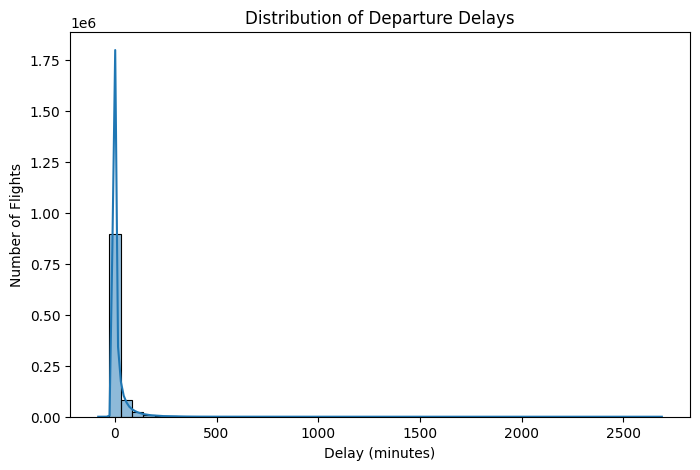

In [255]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(df['DEP_DELAY'], bins=50, kde=True)
plt.title("Distribution of Departure Delays")
plt.xlabel("Delay (minutes)")
plt.ylabel("Number of Flights")
plt.show()


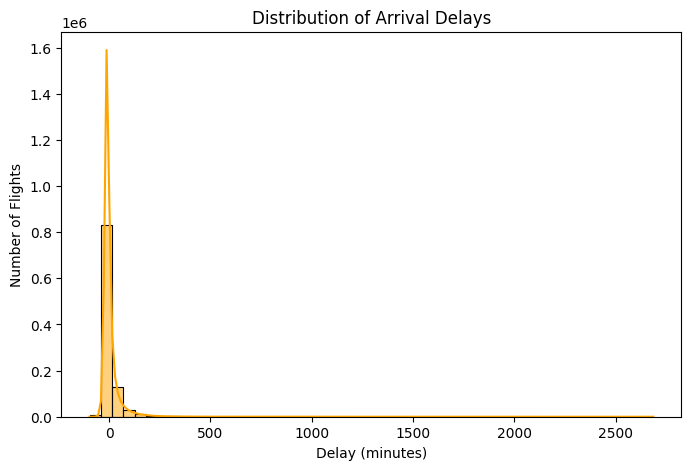

In [257]:
plt.figure(figsize=(8,5))
sns.histplot(df['ARR_DELAY'], bins=50, kde=True, color='orange')
plt.title("Distribution of Arrival Delays")
plt.xlabel("Delay (minutes)")
plt.ylabel("Number of Flights")
plt.show()


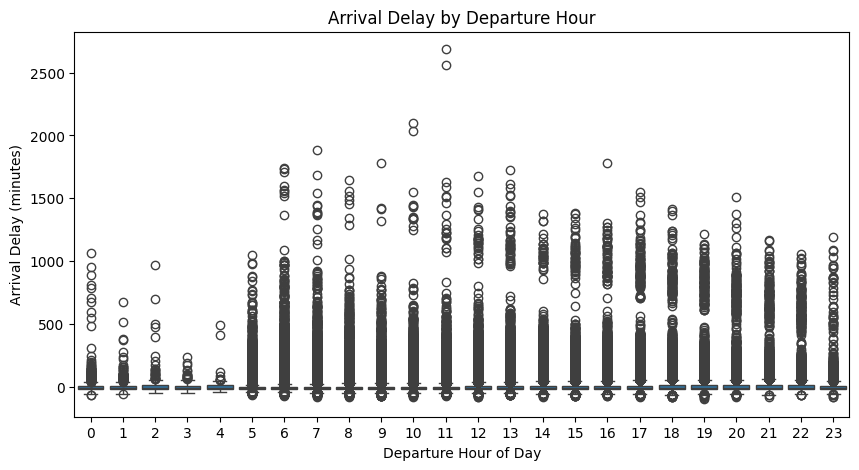

In [259]:
plt.figure(figsize=(10,5))
sns.boxplot(x='DEP_HOUR', y='ARR_DELAY', data=df)
plt.title("Arrival Delay by Departure Hour")
plt.xlabel("Departure Hour of Day")
plt.ylabel("Arrival Delay (minutes)")
plt.show()

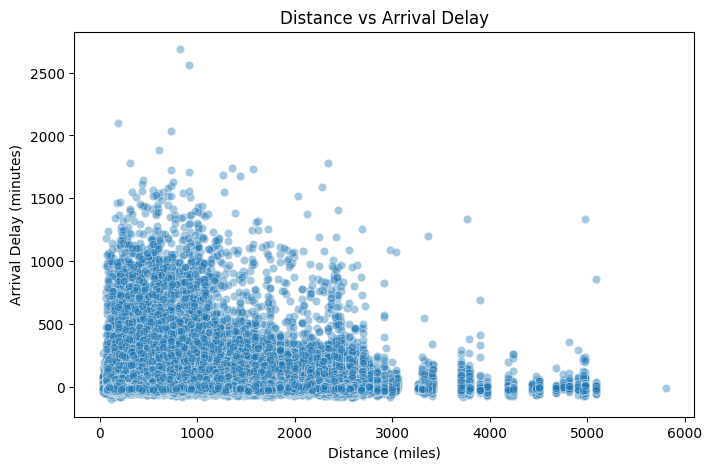

In [261]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='DISTANCE', y='ARR_DELAY', data=df, alpha=0.4)
plt.title("Distance vs Arrival Delay")
plt.xlabel("Distance (miles)")
plt.ylabel("Arrival Delay (minutes)")
plt.show()

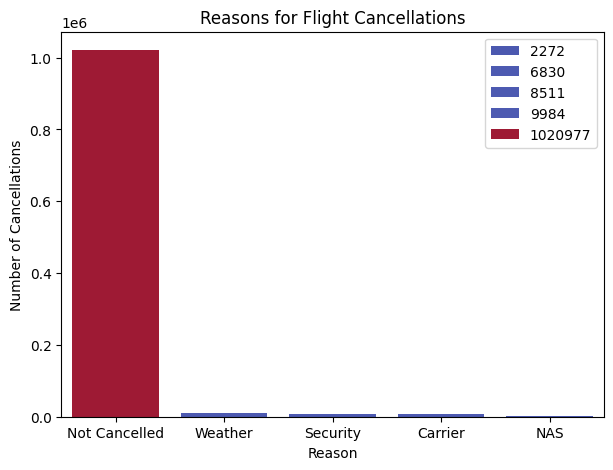

In [263]:
cancel_reason = df["CANCELLATION_CODE"].value_counts().rename({
    'A': 'Carrier',
    'B': 'Weather',
    'C': 'NAS',
    'D': 'Security'
})

plt.figure(figsize=(7,5))
sns.barplot(x=cancel_reason.index, y=cancel_reason.values,hue=cancel_reason.values, palette="coolwarm")
plt.title("Reasons for Flight Cancellations")
plt.xlabel("Reason")
plt.ylabel("Number of Cancellations")
plt.show()


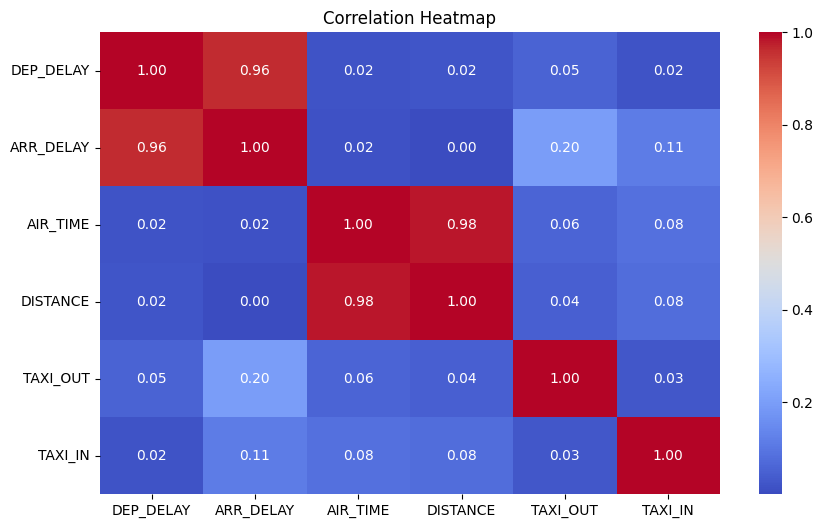

In [265]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['DEP_DELAY', 'ARR_DELAY', 'AIR_TIME', 'DISTANCE', 'TAXI_OUT', 'TAXI_IN']].corr(), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [267]:
print("Average Departure Delay:", df['DEP_DELAY'].mean())
print("Average Arrival Delay:", df['ARR_DELAY'].mean())
print("Percentage of Cancelled Flights:", df['CANCELLED'].mean() * 100, "%")
print("Percentage of Diverted Flights:", df['DIVERTED'].mean() * 100, "%")

Average Departure Delay: 10.092438909005786
Average Arrival Delay: 4.262107660740057
Percentage of Cancelled Flights: 2.6318600308609597 %
Percentage of Diverted Flights: 0.22954984579056892 %


In [275]:
# Save to Excel file
df.to_excel("cleaned_flights_data.xlsx", index=False)